In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score as sklearn_f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier





In [4]:
# Load the train and test data
train_data = pd.read_csv("Train_Data capstone.csv")
test_data = pd.read_csv("Test_Data.csv")

In [5]:
nan_values = train_data.isna().sum()

# Print the columns with NaN values and their corresponding counts
print(nan_values)

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64


In [6]:
# Create a label encoder
encoder = LabelEncoder()

# Encode the features in the pc column
train_data["pc"] = encoder.fit_transform(train_data["pc"])
train_data["ma"] = encoder.fit_transform(train_data["ma"])

In [7]:
features = train_data.drop("pred", axis=1)

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_data = imputer.fit_transform(features)

# Convert the imputed data back to a DataFrame
train_imputed = pd.DataFrame(imputed_data, columns=features.columns)

In [8]:
train_imputed


,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,3.0,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.09680,150.3390,12.48800,173.1240,3.0
1,3.0,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.33040,101.0205,12.50960,131.4075,3.0
2,0.0,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,14.01472,122.5350,11.71360,176.8200,2.0
3,2.0,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,14.49264,124.8030,13.84240,168.2625,0.0
4,0.0,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.47200,120.2145,12.43648,150.1185,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,0.0,139.08,73.5,7.2,84.0,13.8016,115.9725,13.8856,189.0000,8.6536,196.7490,9.2216,170.8770,17.37440,164.7240,12.57200,144.4065,2.0
22580,2.0,156.74,63.0,5.6,105.0,13.6464,130.2000,12.4688,180.3690,10.6984,212.6355,8.1152,167.8110,13.56560,129.5070,11.13440,162.9642,0.0
22581,1.0,115.63,147.0,4.8,31.5,13.4344,115.5000,13.5752,190.8900,9.6144,219.6810,9.3120,156.7440,15.97120,109.3680,12.84800,153.5835,3.0
22582,3.0,216.26,105.0,4.8,31.5,13.8176,112.5285,13.2408,166.8555,9.0160,200.3610,7.4760,174.7830,16.78880,135.1770,12.73360,158.0985,3.0


In [9]:
# Select only the numerical columns for scaling
numerical_columns = train_imputed.drop(["ma", "pc"], axis=1)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with the scaled numerical columns
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns.columns)

# Concatenate the scaled numerical columns with the categorical columns
final_data = pd.concat([scaled_df, train_imputed[["ma", "pc"]]], axis=1)

In [10]:
final_data

,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pc
0,-1.134736,-0.347635,0.181634,-0.379483,-0.274203,0.732847,-1.607531,0.478372,-0.541861,0.134717,0.187473,-1.887745,0.641007,1.798912,-0.037468,0.303099,3.0,3.0
1,-0.486554,-1.077552,1.848057,0.528574,-1.202052,0.540930,-0.218743,-0.076497,-0.668477,0.715762,-0.857331,-0.998148,-1.687922,-1.427563,-0.013445,-2.441572,3.0,3.0
2,1.073143,-1.807469,-0.294487,0.225888,0.383525,0.550020,-0.070956,-0.910323,-0.506409,-0.910356,2.758673,-0.861008,-1.111818,-0.020058,-0.898747,0.546272,2.0,0.0
3,-0.140240,-1.077552,0.181634,-0.076797,0.970962,-0.322697,-1.725962,0.286653,1.697712,-0.573431,1.870997,0.450893,-0.709475,0.128317,1.468880,-0.016755,0.0,2.0
4,-0.062910,0.382282,0.181634,-0.682168,0.220850,1.175266,1.118421,0.378962,-0.090097,0.323355,0.874147,0.240467,-0.726851,-0.171868,-0.094768,-1.210511,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,0.287771,-0.104329,0.181634,0.528574,-0.552357,-0.696430,0.236764,0.493588,-0.919682,-0.291987,0.100747,0.114211,1.716571,2.739996,0.055955,-1.586323,2.0,0.0
22580,0.741473,-0.347635,-0.294487,1.133945,-0.747165,0.672241,-1.555907,-0.340238,1.669351,1.234263,-1.310352,-0.097667,-1.489916,0.436058,-1.542927,-0.365349,0.0,2.0
22581,-0.314682,1.598811,-0.532547,-0.984854,-1.013269,-0.741884,-0.155984,0.676178,0.296839,1.911139,0.216042,-0.862460,0.535269,-0.881459,0.362919,-0.982537,3.0,1.0
22582,2.270598,0.625588,-0.532547,-0.984854,-0.532274,-1.027739,-0.579099,-1.645754,-0.460827,0.055025,-2.125585,0.384137,1.223576,0.806996,0.235685,-0.685480,3.0,3.0


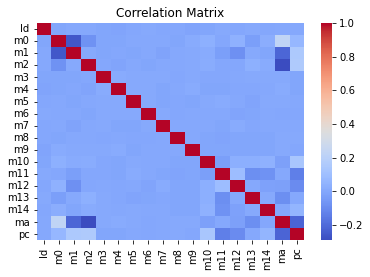

In [11]:
# Compute the correlation matrix
correlation_matrix = final_data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.show()

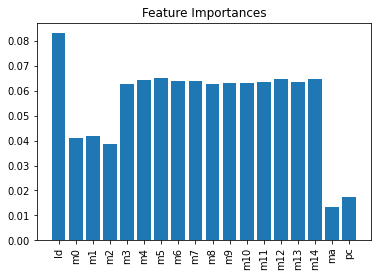

In [12]:
rf = RandomForestClassifier()
y=train_data["pred"]
rf.fit(final_data, y)

# Plot feature importances
importances = rf.feature_importances_
indices = range(len(importances))
plt.bar(indices, importances)
plt.xticks(indices, final_data.columns, rotation='vertical')
plt.title("Feature Importances")
plt.show()

In [13]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(final_data, y, test_size=0.2, random_state=42)

# Train and evaluate Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_val)
dtree_accuracy = accuracy_score(y_val, dtree_pred)
print("Decision Tree Accuracy:", dtree_accuracy)


Decision Tree Accuracy: 0.6575160504759796


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

KeyboardInterrupt: 

In [18]:
# Create a label encoder
encoder = LabelEncoder()

# Encode the features in the pc column
test_data["pc"] = encoder.fit_transform(test_data["pc"])
test_data["ma"] = encoder.fit_transform(test_data["ma"])

In [31]:
featurest = test_data.drop("index", axis=1)

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_datat = imputer.fit_transform(featurest)

# Convert the imputed data back to a DataFrame
test_imputed = pd.DataFrame(imputed_datat, columns=featurest.columns)

In [32]:
# Select only the numerical columns for scaling
testnumerical_columns = test_imputed.drop(["ma", "pc"], axis=1)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(testnumerical_columns)

# Create a new DataFrame with the scaled numerical columns
scaled_df = pd.DataFrame(scaled_data, columns=testnumerical_columns.columns)

# Concatenate the scaled numerical columns with the categorical columns
final_testdata = pd.concat([scaled_df, test_imputed[["ma", "pc"]]], axis=1)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the target variable for the validation set

y_pred_5 = dtree.predict(final_testdata)

In [70]:

print(y_pred_5.sum())

970


In [71]:
y_pred_5

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [35]:
y_pred.shape

(3986,)

In [72]:
df_pred_5 = pd.DataFrame({'pred': y_pred_5})

In [47]:
df_pred_2.value_counts()

pred
0       3872
1        114
Name: count, dtype: int64

In [38]:
df_pred.value_counts()

pred
0       3986
Name: count, dtype: int64

In [53]:
df_pred.to_csv('submission1.csv', index=False)

In [54]:

df_pred_5.to_csv('submission05.csv', index=False)